---
title: Multivariate Statistics
subtitle: Foundations of Statistical Analysis in Python
abstract: This notebook explores multivariate relationships through linear regression analysis, highlighting its strengths and limitations. Practical examples and visualizations are provided to help users understand and apply these statistical concepts effectively.
author:
  - name: Karol Flisikowski
    affiliations: 
      - Gdansk University of Technology
      - Chongqing Technology and Business University
    orcid: 0000-0002-4160-1297
    email: karol@ctbu.edu.cn
date: 2025-05-25
---

## Goals of this lecture

There are many ways to *describe* a distribution. 

Here we will discuss:
- Measurement of the relationship between distributions using **linear, regression analysis**.

## Importing relevant libraries

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns ### importing seaborn
import pandas as pd
import scipy.stats as ss

In [41]:
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

In [42]:
import pandas as pd
df_estate = pd.read_csv("real_estate.csv")
df_estate.head(5)

,No,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
0,1,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,5.0,390.56840,5,24.97937,121.54245,43.1


## Describing *multivariate* data with regression models

- So far, we've been focusing on *univariate and bivariate data*: analysis.
- What if we want to describe how *two or more than two distributions* relate to each other?

1. Let's simplify variables' names:

In [43]:
df_estate = df_estate.rename(columns={
    'house age': 'house_age_years',
    'house price of unit area': 'price_twd_msq',
    'number of convenience stores': 'n_convenience',
    'distance to the nearest MRT station': 'dist_to_mrt_m'
})

df_estate.head(5)

,No,house_age_years,dist_to_mrt_m,n_convenience,latitude,longitude,price_twd_msq
0,1,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,5.0,390.56840,5,24.97937,121.54245,43.1


We can also perform binning for "house_age_years":

In [44]:
df_estate['house_age_cat'] = pd.cut(
    df_estate['house_age_years'],
    bins=[0, 15, 30, 45],
    include_lowest=True,
    right=False
)
df_estate.head(5)

,No,house_age_years,dist_to_mrt_m,n_convenience,latitude,longitude,price_twd_msq,house_age_cat
0,1,32.0,84.87882,10,24.98298,121.54024,37.9,"[30, 45)"
1,2,19.5,306.59470,9,24.98034,121.53951,42.2,"[15, 30)"
2,3,13.3,561.98450,5,24.98746,121.54391,47.3,"[0, 15)"
3,4,13.3,561.98450,5,24.98746,121.54391,54.8,"[0, 15)"
4,5,5.0,390.56840,5,24.97937,121.54245,43.1,"[0, 15)"


In [45]:
cat_dict = {
    pd.Interval(left=0, right=15, closed='left'): '0-15',
    pd.Interval(left=15, right=30, closed='left'): '15-30',
    pd.Interval(left=30, right=45, closed='left'): '30-45'
}

df_estate['house_age_cat_str'] = df_estate['house_age_cat'].map(cat_dict)
df_estate['house_age_cat_str'] = df_estate['house_age_cat_str'].astype('category')
df_estate.head()

,No,house_age_years,dist_to_mrt_m,n_convenience,latitude,longitude,price_twd_msq,house_age_cat,house_age_cat_str
0,1,32.0,84.87882,10,24.98298,121.54024,37.9,"[30, 45)",30-45
1,2,19.5,306.59470,9,24.98034,121.53951,42.2,"[15, 30)",15-30
2,3,13.3,561.98450,5,24.98746,121.54391,47.3,"[0, 15)",0-15
3,4,13.3,561.98450,5,24.98746,121.54391,54.8,"[0, 15)",0-15
4,5,5.0,390.56840,5,24.97937,121.54245,43.1,"[0, 15)",0-15


In [46]:
#Checking the updated datatype of house_age_years
df_estate.house_age_cat_str.dtype

CategoricalDtype(categories=['0-15', '15-30', '30-45'], ordered=True, categories_dtype=object)

In [47]:
#Checking the dataframe for any NA values
df_estate.isna().any()

No                   False
house_age_years      False
dist_to_mrt_m        False
n_convenience        False
latitude             False
longitude            False
price_twd_msq        False
house_age_cat        False
house_age_cat_str    False
dtype: bool

## Descriptive Statistics

Prepare a heatmap with correlation coefficients on it:

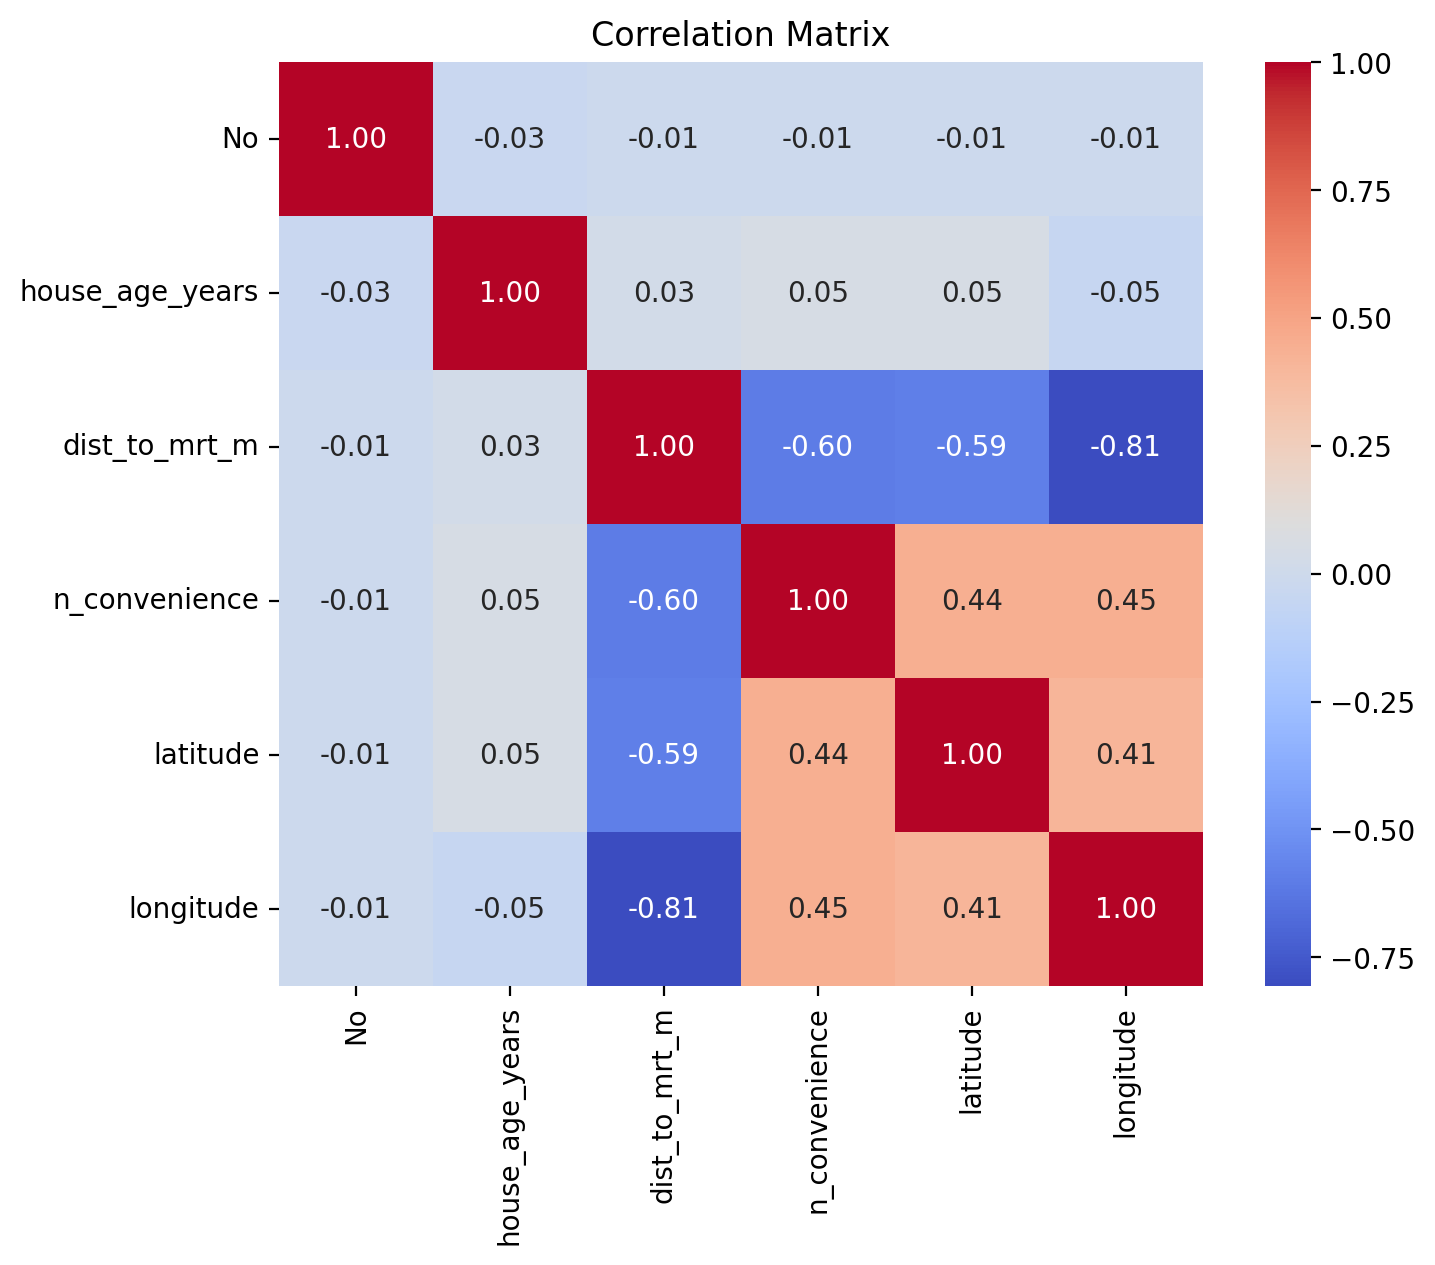

In [48]:
corr_matrix = df_estate.iloc[:, :6].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix")
plt.show()

Draw a scatter plot of n_convenience vs. price_twd_msq:

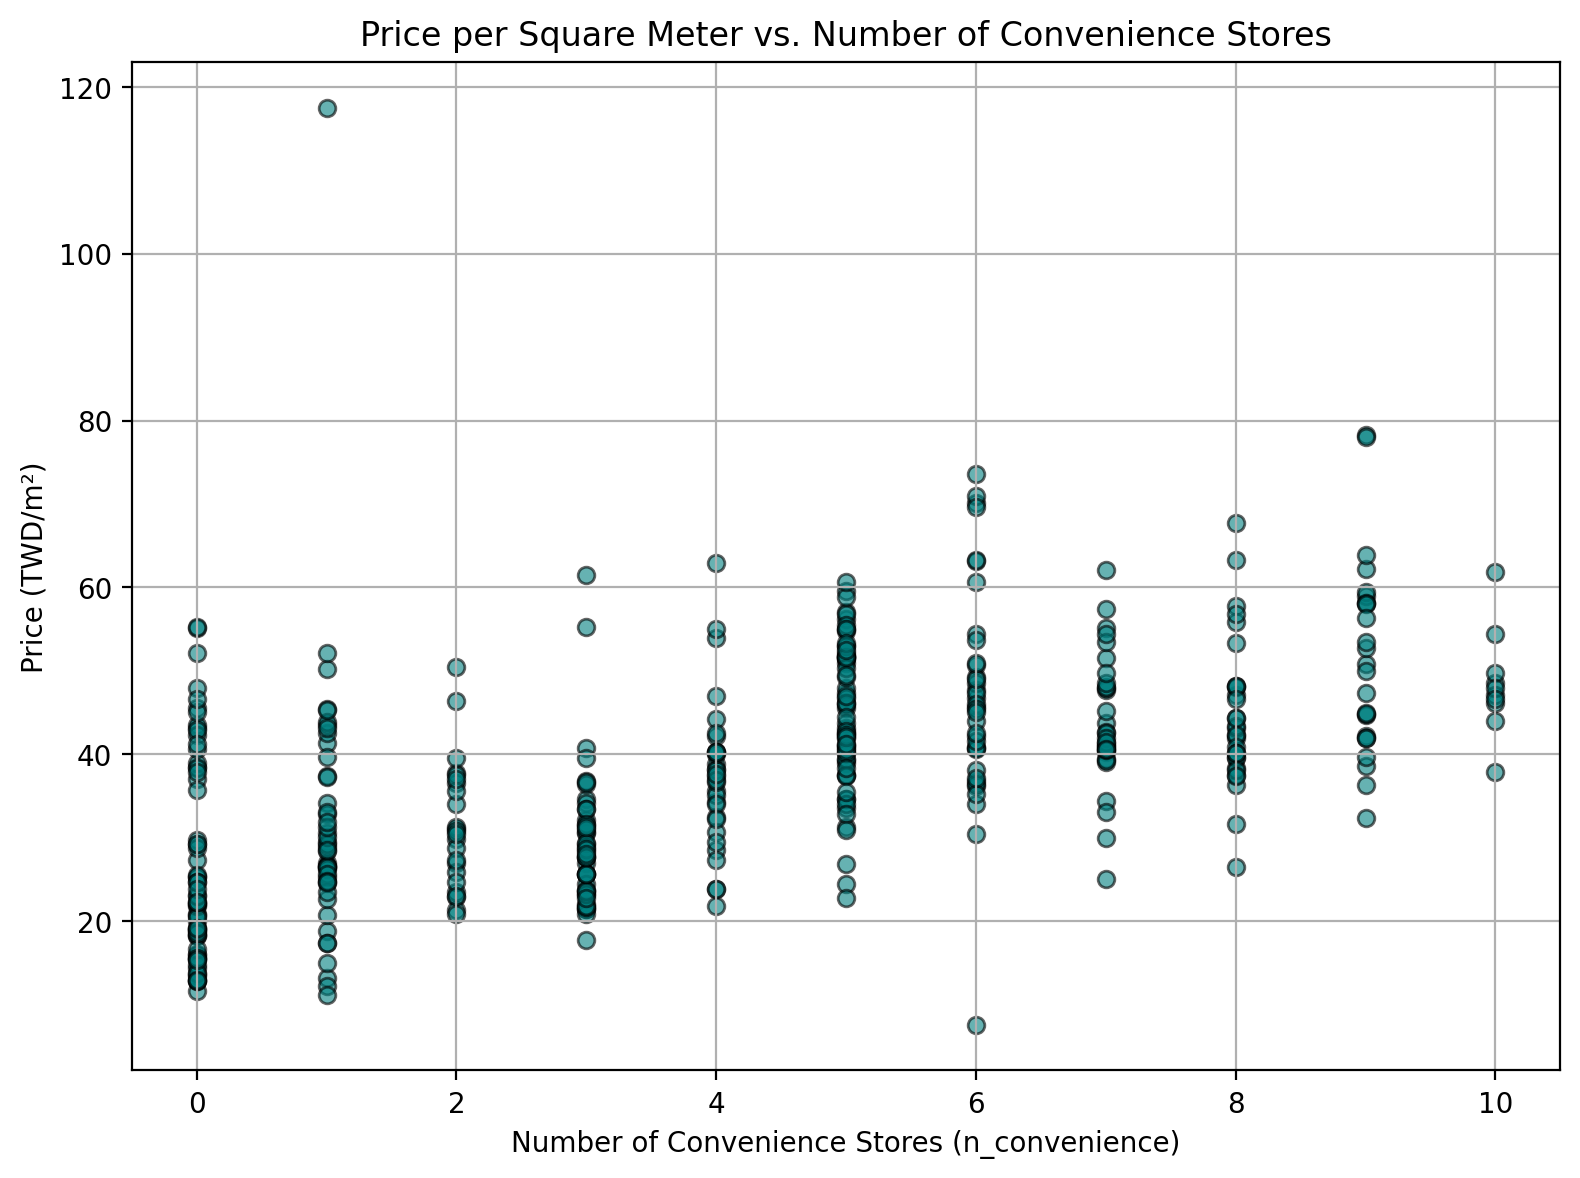

In [49]:


# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df_estate['n_convenience'], df_estate['price_twd_msq'], alpha=0.6, color='teal', edgecolor='k')

plt.title('Price per Square Meter vs. Number of Convenience Stores')
plt.xlabel('Number of Convenience Stores (n_convenience)')
plt.ylabel('Price (TWD/m²)')
plt.grid(True)
plt.tight_layout()
plt.show()

Draw a scatter plot of house_age_years vs. price_twd_msq:

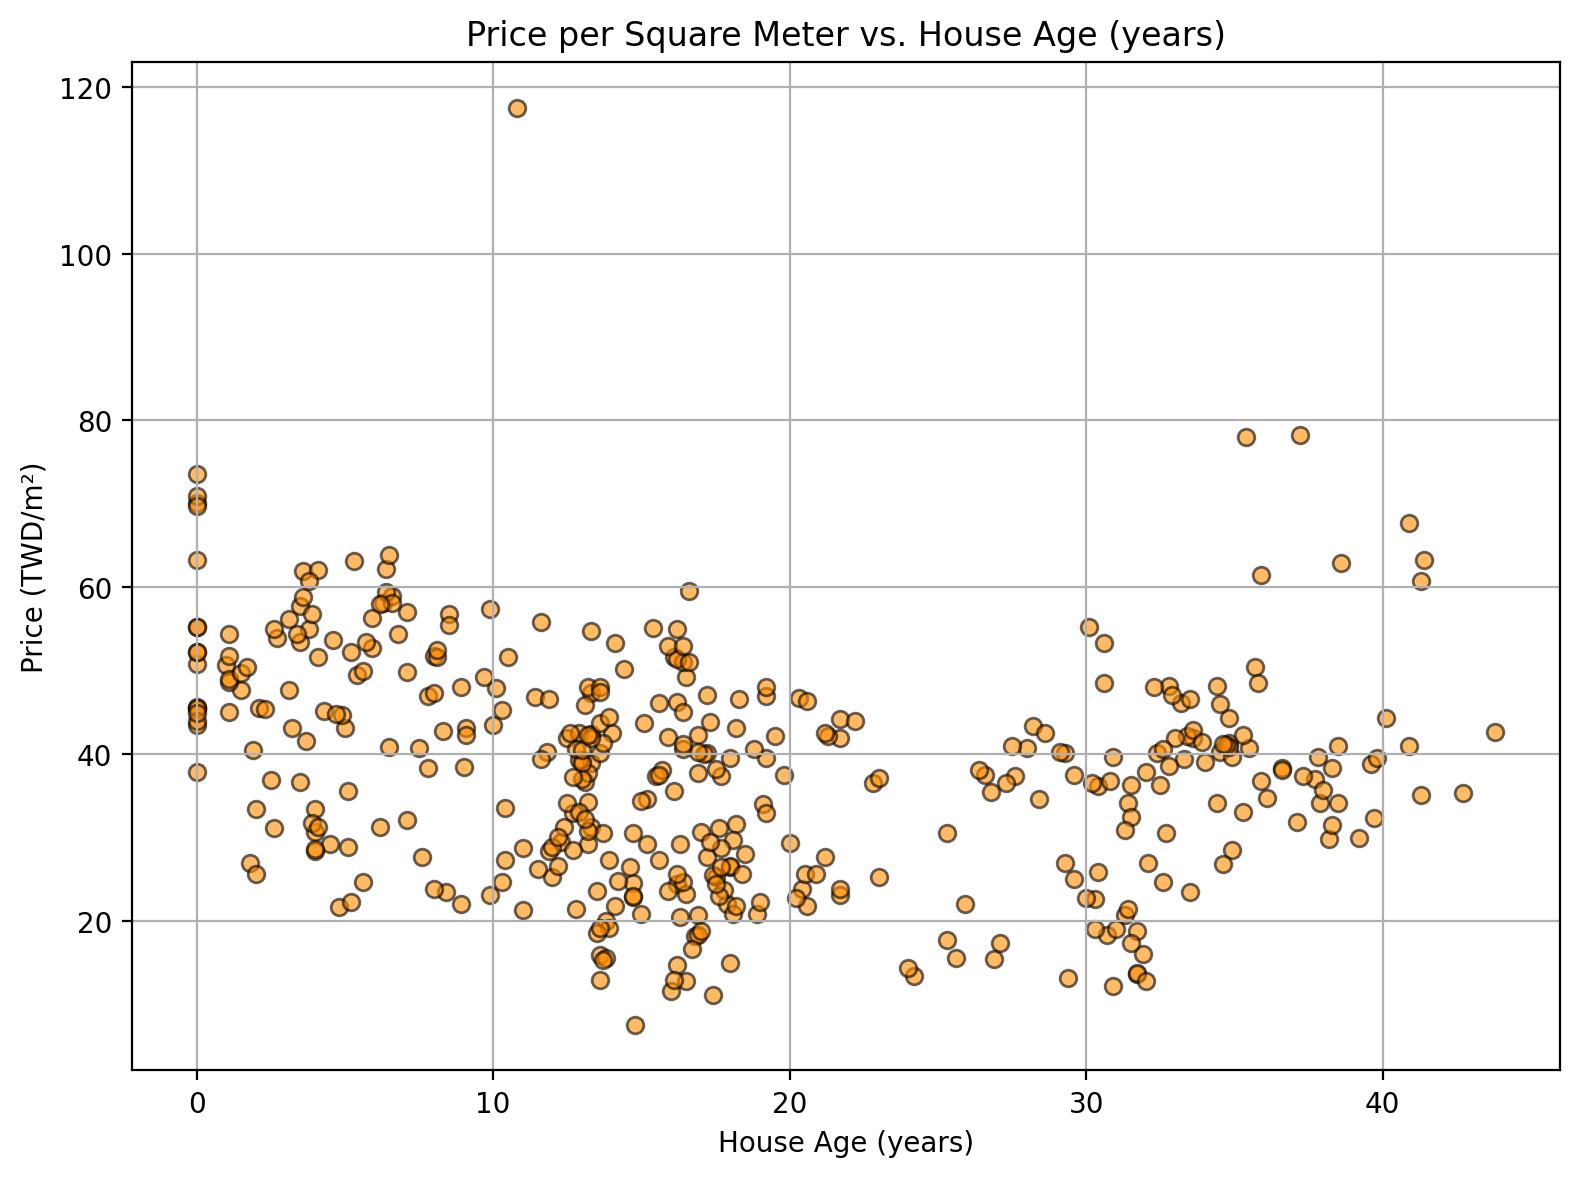

In [50]:
# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df_estate['house_age_years'], df_estate['price_twd_msq'], alpha=0.6, color='darkorange', edgecolor='k')

plt.title('Price per Square Meter vs. House Age (years)')
plt.xlabel('House Age (years)')
plt.ylabel('Price (TWD/m²)')
plt.grid(True)
plt.tight_layout()
plt.show()

Draw a scatter plot of distance to nearest MRT station vs. price_twd_msq:

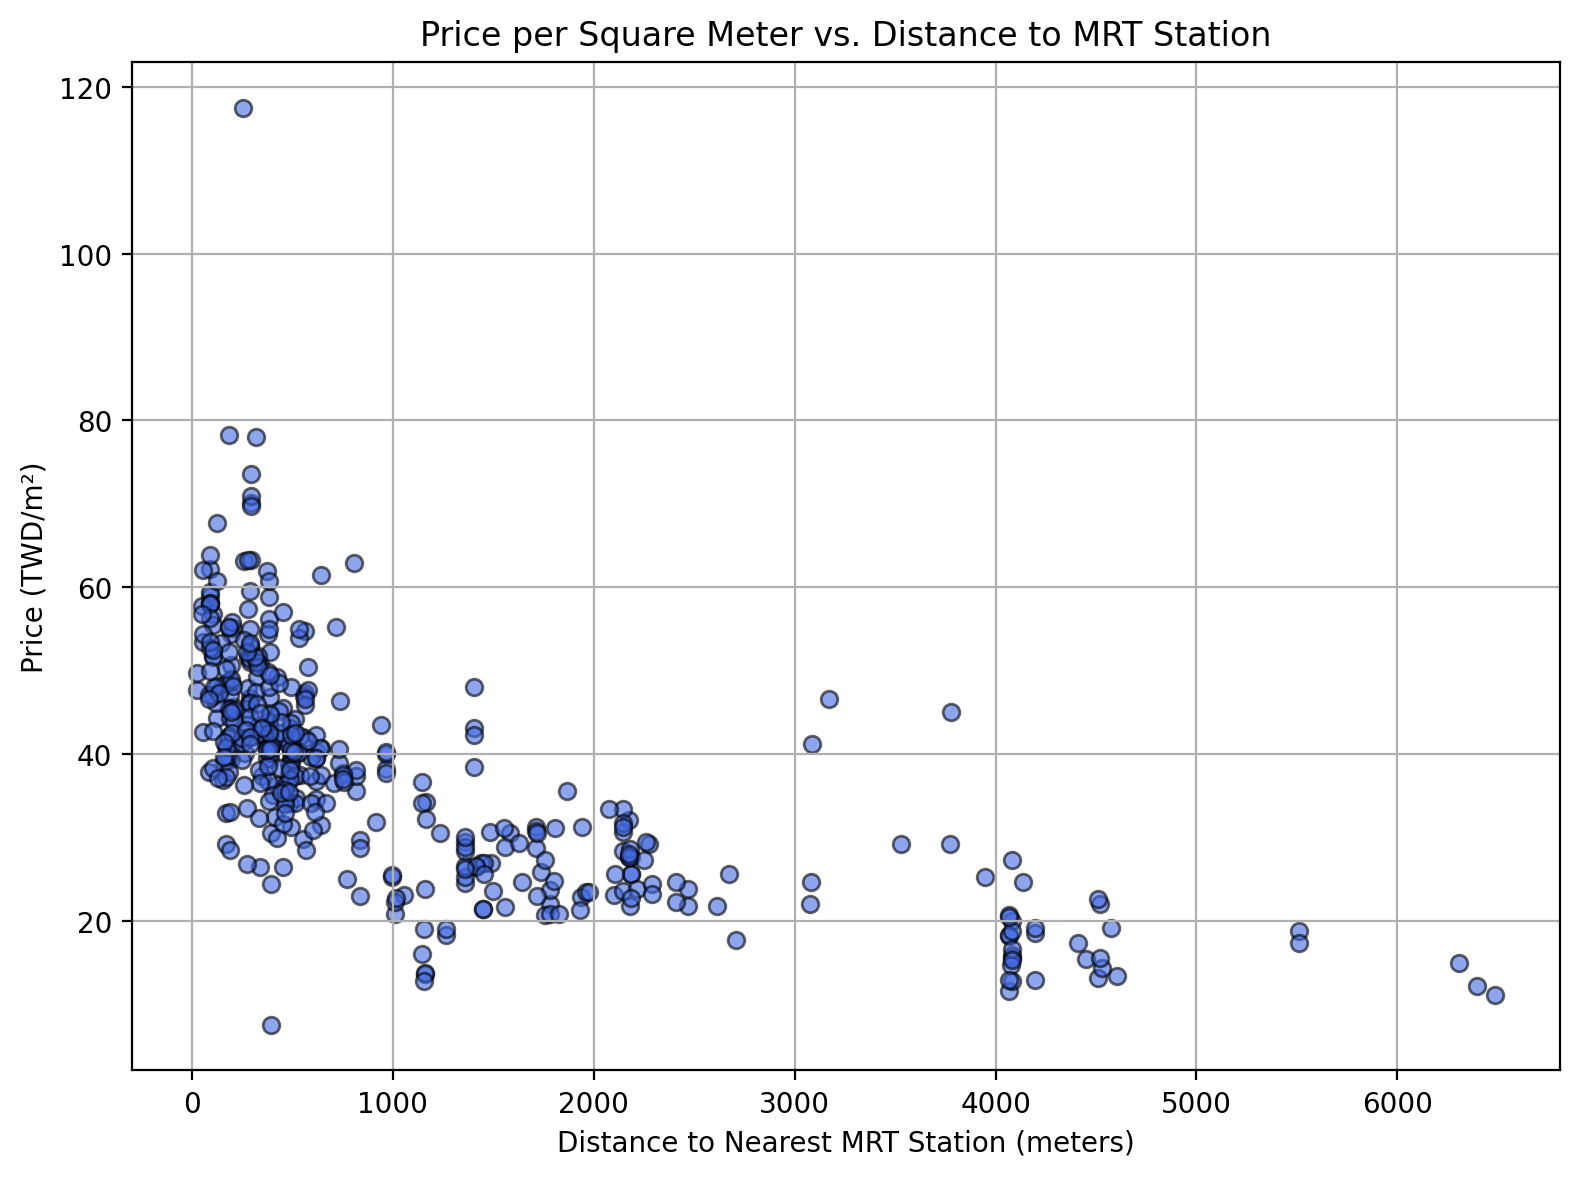

In [51]:
plt.figure(figsize=(8, 6))
plt.scatter(df_estate['dist_to_mrt_m'], df_estate['price_twd_msq'], alpha=0.6, color='royalblue', edgecolor='k')

plt.title('Price per Square Meter vs. Distance to MRT Station')
plt.xlabel('Distance to Nearest MRT Station (meters)')
plt.ylabel('Price (TWD/m²)')
plt.grid(True)
plt.tight_layout()
plt.show()

Plot a histogram of price_twd_msq with 10 bins, facet the plot so each house age group gets its own panel:

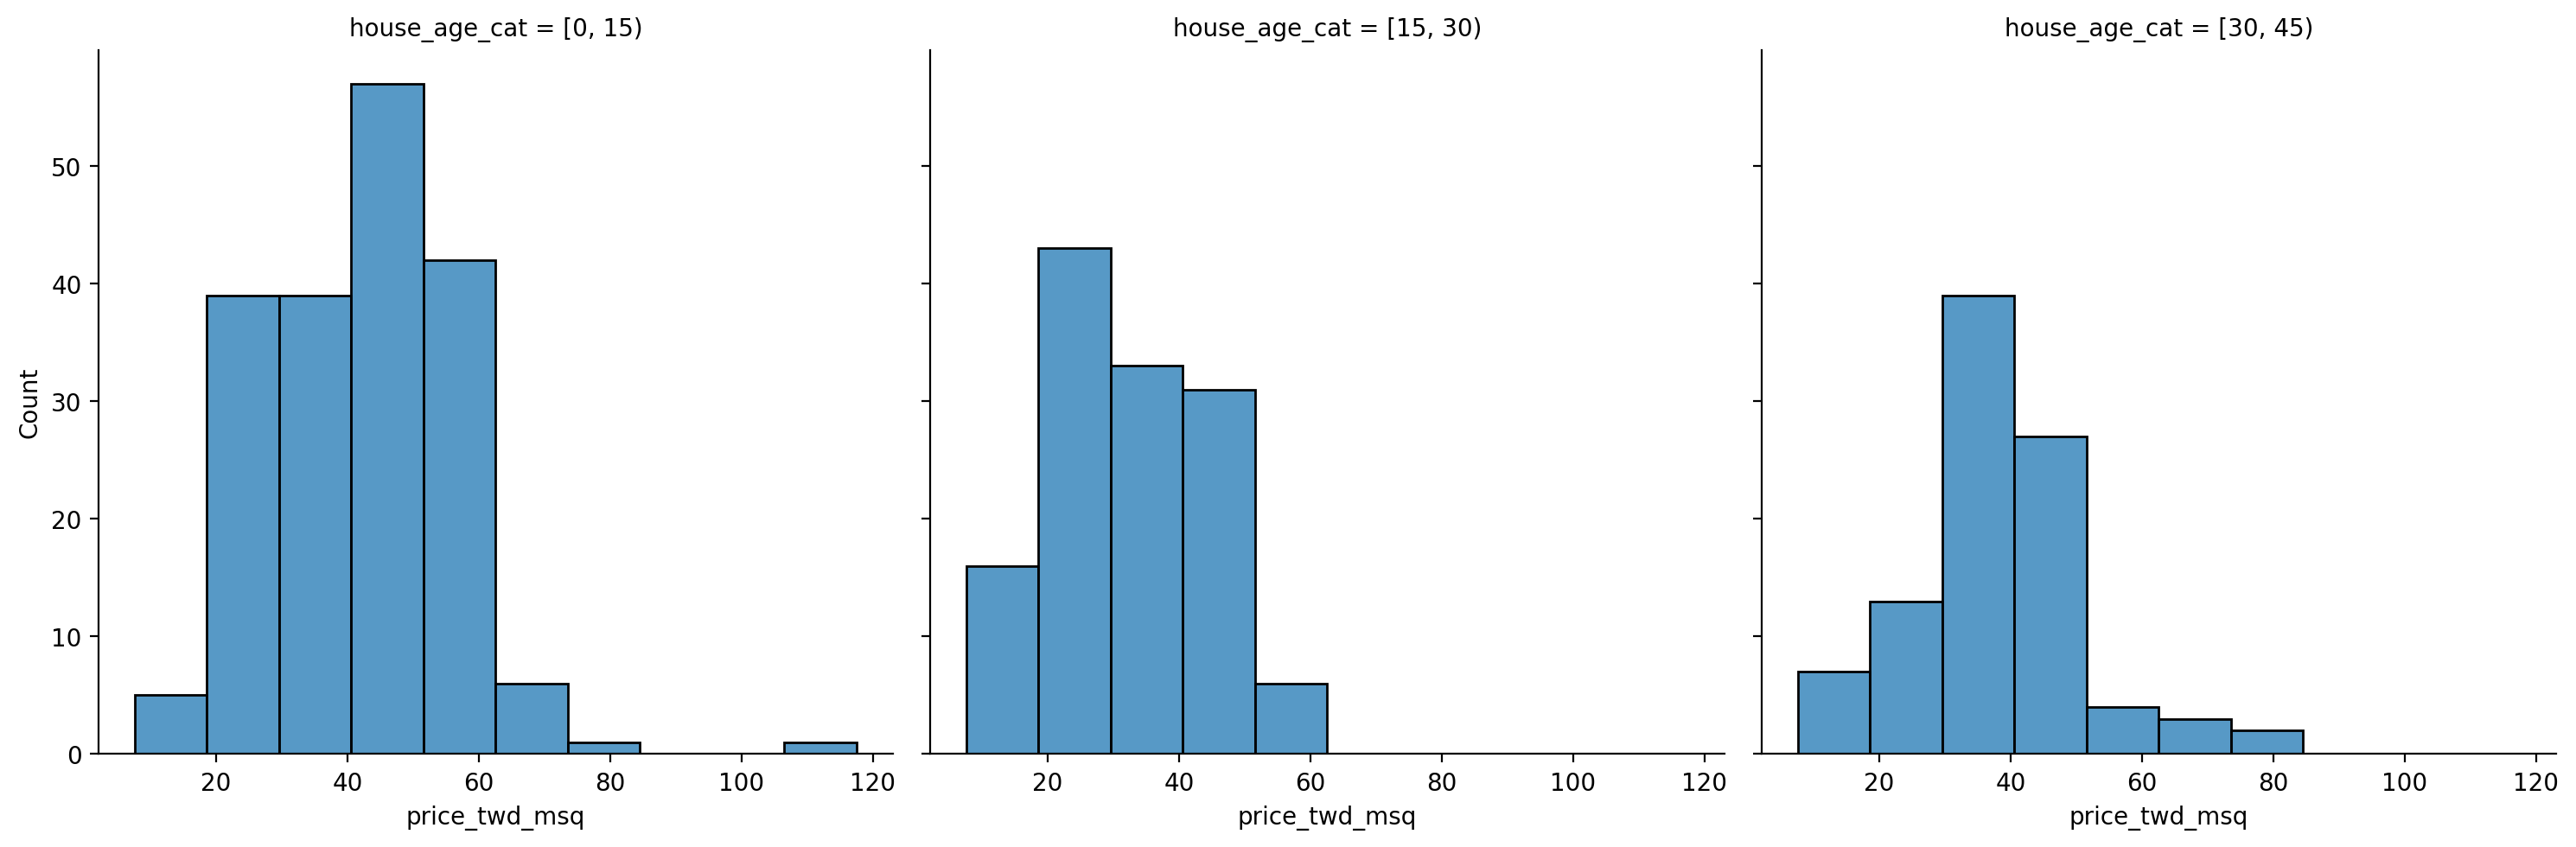

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


sns.displot(
    data=df_estate,
    x='price_twd_msq',
    bins=10,
    col='house_age_cat',
    kde=False   
)
plt.tight_layout()
plt.show()

Summarize to calculate the mean, sd, median etc. house price/area by house age:

In [53]:

summary = df_estate.groupby('house_age_cat')['price_twd_msq'].agg(
    mean_price='mean',
    median_price='median',
    std_price='std',
    min_price='min',
    max_price='max',
    count='count'
).reset_index()

print(summary)

  house_age_cat  mean_price  median_price  std_price  min_price  max_price  \
0       [0, 15)   41.766842         42.55  14.164308        7.6      117.5   
1      [15, 30)   32.642636         32.90  11.398217       11.2       59.6   
2      [30, 45)   37.654737         38.30  12.842547       12.2       78.3   

   count  
0    190  
1    129  
2     95  


C:\Users\Rodion\AppData\Local\Temp\ipykernel_19852\3974664071.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df_estate.groupby('house_age_cat')['price_twd_msq'].agg(


## Simple model

Run a linear regression of price_twd_msq vs. best, but only 1 predictor:

In [54]:
import statsmodels.api as sm

# Let's use 'dist_to_mrt_m' as the single best predictor
X = df_estate[['dist_to_mrt_m']]
y = df_estate['price_twd_msq']

# Add constant for intercept
X = sm.add_constant(X)

# Fit the model
model1 = sm.OLS(y, X).fit()

# Show the summary
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:          price_twd_msq   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     342.2
Date:                Sun, 08 Jun 2025   Prob (F-statistic):           4.64e-56
Time:                        19:34:56   Log-Likelihood:                -1542.5
No. Observations:                 414   AIC:                             3089.
Df Residuals:                     412   BIC:                             3097.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            45.8514      0.653     70.258

What do the above results mean? Write down the model and interpret it.

Discuss model accuracy.


Intercept (const)	45.85	,
dist_to_mrt_m	-0.0073

When distance to MRT is 0 (i.e., at the MRT), expected price per square meter is  45.85k. 
For each 1 meter increase in distance from MRT, the price per square meter decreases by 0.0073.

R-squared = 0.454
About 45.4% of the variance in housing prices per square meter is explained by the distance to the MRT station.

This indicates a moderate fit — there's some predictive power, but a majority of price variation is due to other factors.

Adjusted R-squared = 0.452
Very close to R², indicating stability and no overfitting (since there's only one predictor).

 p-value (4.64e-56)
The low p-value shows the relationship between distance and price is not due to random chance.

Skew = 1.263 and Kurtosis = 10.135 indicate non-normality and heavy tails, which might affect inference accuracy (like confidence intervals).

 Summary
Model: Linear relationship between MRT distance and housing price.

Interpretation: Closer proximity to an MRT station increases property value.

Accuracy: Moderate explanatory power (R² = 0.454); significant, but residuals are non-normal and may violate OLS assumptions.



## Model diagnostics

### 4 Diagnostic plots

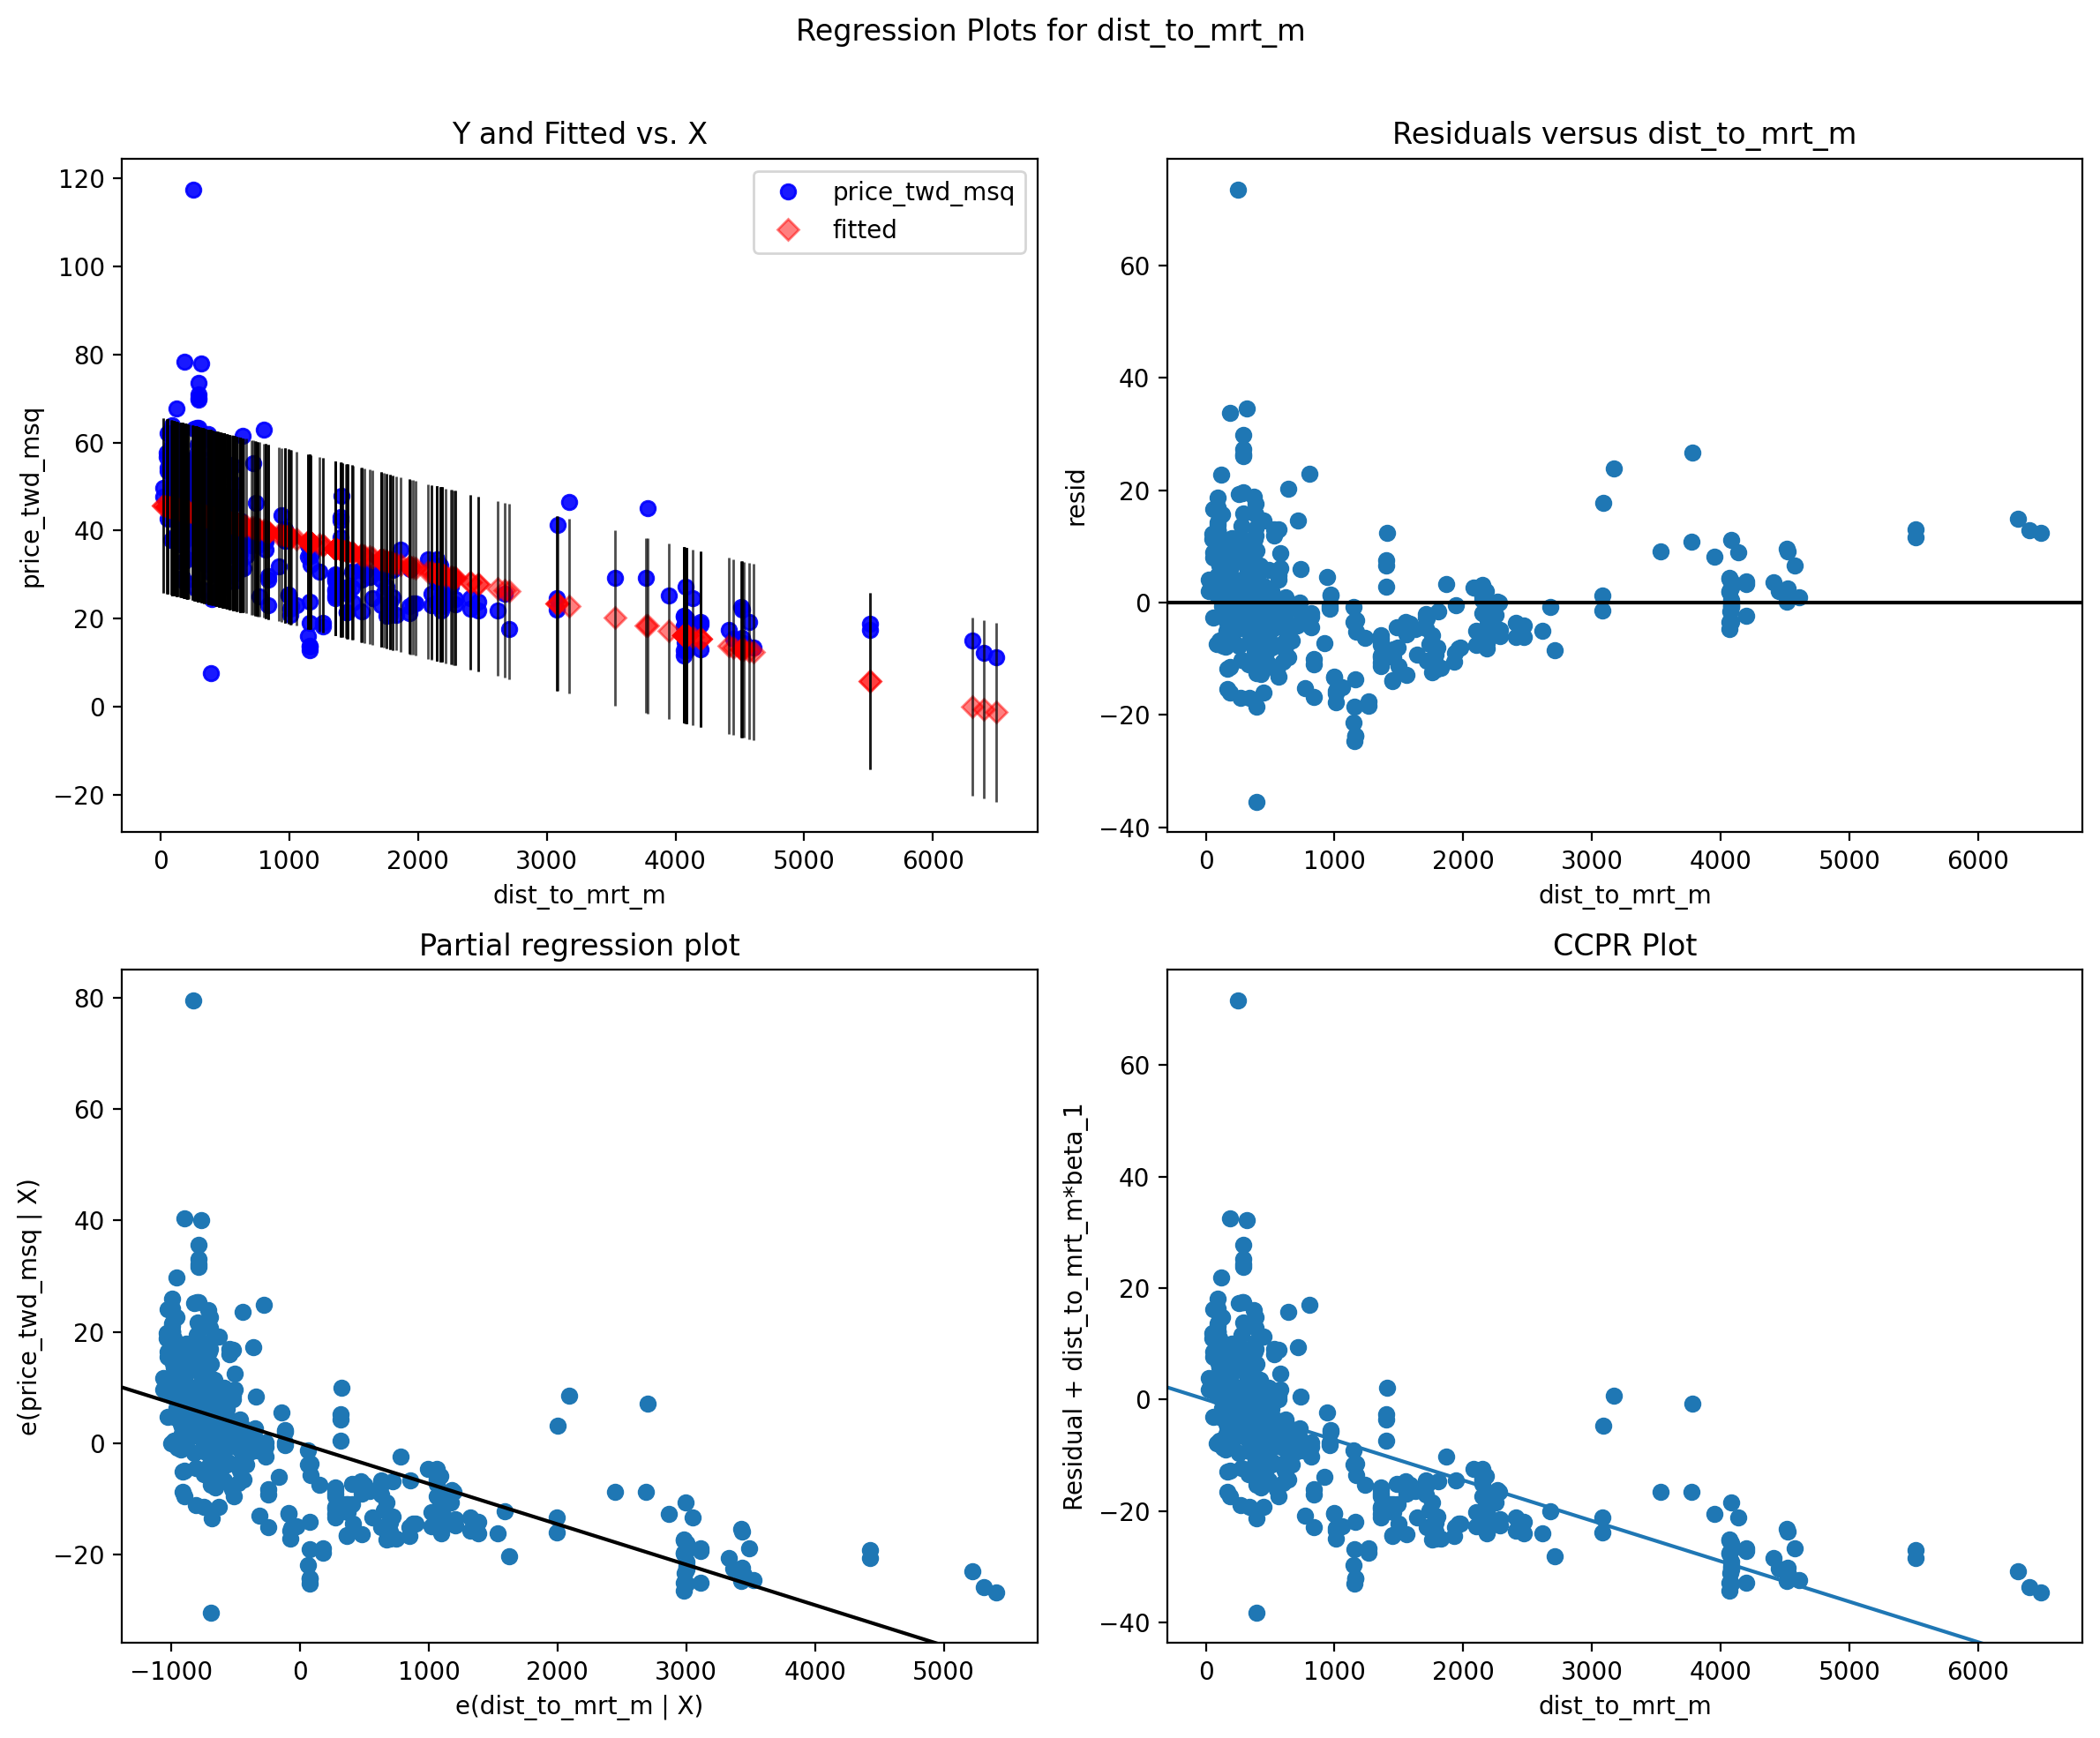

In [55]:
fig = plt.figure(figsize=(12, 10))
sm.graphics.plot_regress_exog(model1, 'dist_to_mrt_m', fig=fig)
plt.show()

The four plots show...

### Outliers and high levarage points:

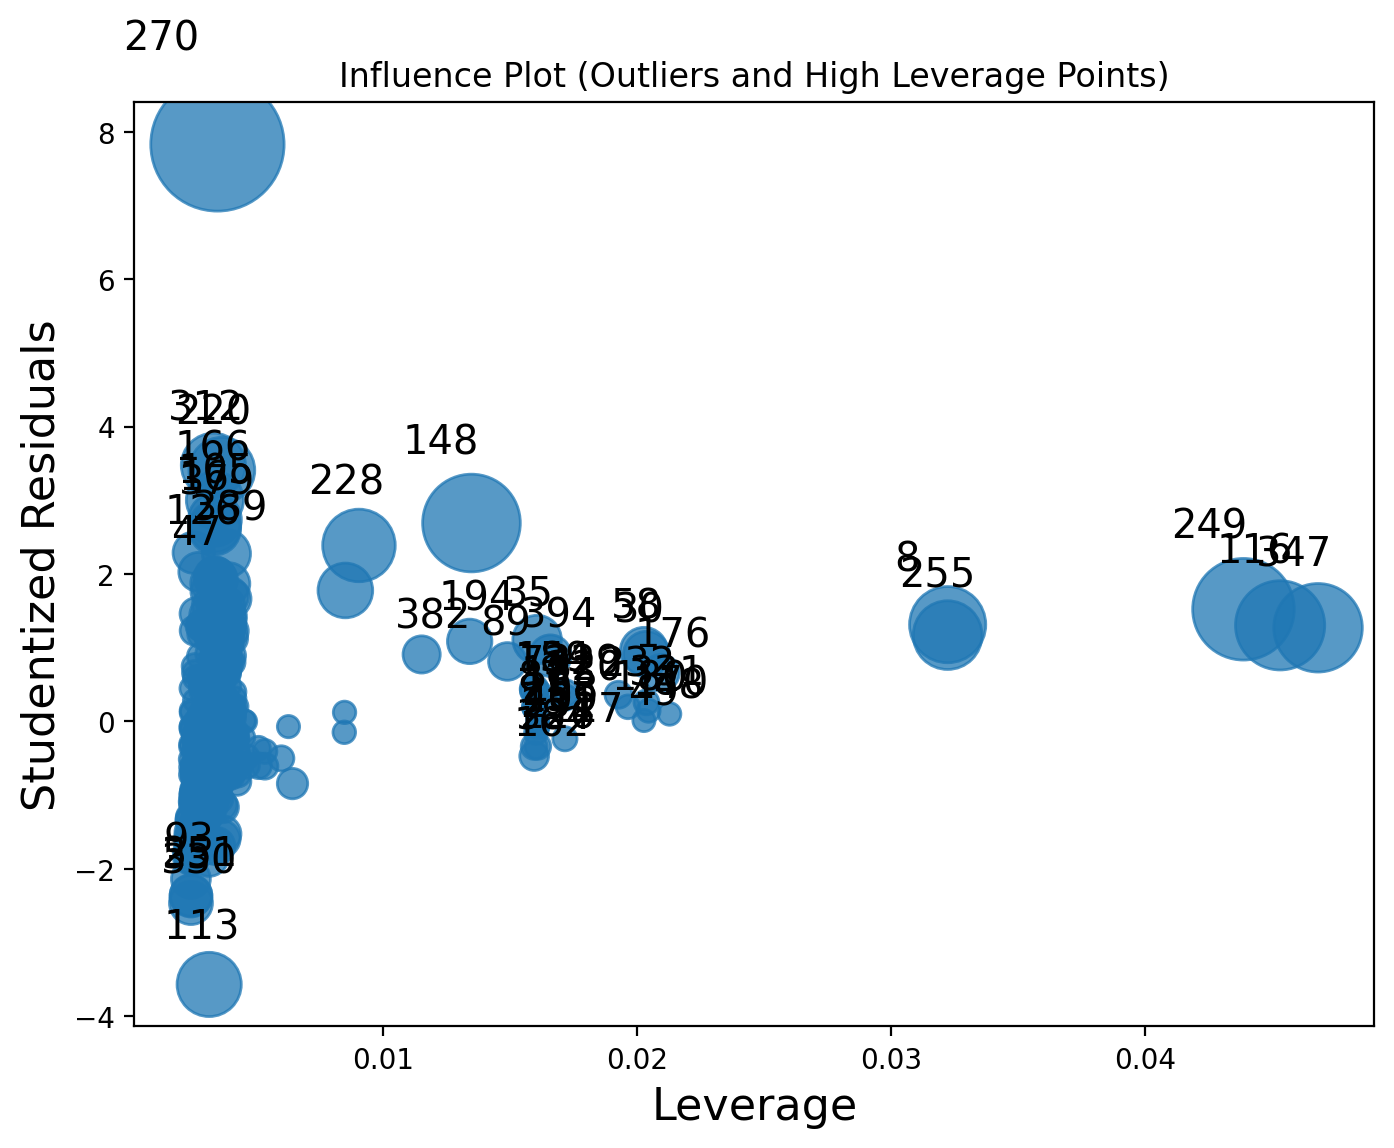

In [56]:
fig, ax = plt.subplots(figsize=(8, 6))
sm.graphics.influence_plot(model1, ax=ax, criterion="cooks")
plt.title("Influence Plot (Outliers and High Leverage Points)")
plt.show()

Discussion:


## Multiple Regression Model

### Test and training set 

We begin by splitting the dataset into two parts, training set and testing set. In this example we will randomly take 75% row in this dataset and put it into the training set, and other 25% row in the testing set:

In [57]:
# One-hot encoding for house_age_cat_str in df_estate

encode_dict = {True: 1, False: 0}

house_age_0_15 = df_estate['house_age_cat_str'] == '0-15'
house_age_15_30 = df_estate['house_age_cat_str'] == '15-30'
house_age_30_45 = df_estate['house_age_cat_str'] == '30-45'

df_estate['house_age_0_15'] = house_age_0_15.map(encode_dict)
df_estate['house_age_15_30'] = house_age_15_30.map(encode_dict)
df_estate['house_age_30_45'] = house_age_30_45.map(encode_dict)

df_estate.head()

,No,house_age_years,dist_to_mrt_m,n_convenience,latitude,longitude,price_twd_msq,house_age_cat,house_age_cat_str,house_age_0_15,house_age_15_30,house_age_30_45
0,1,32.0,84.87882,10,24.98298,121.54024,37.9,"[30, 45)",30-45,0,0,1
1,2,19.5,306.59470,9,24.98034,121.53951,42.2,"[15, 30)",15-30,0,1,0
2,3,13.3,561.98450,5,24.98746,121.54391,47.3,"[0, 15)",0-15,1,0,0
3,4,13.3,561.98450,5,24.98746,121.54391,54.8,"[0, 15)",0-15,1,0,0
4,5,5.0,390.56840,5,24.97937,121.54245,43.1,"[0, 15)",0-15,1,0,0


In [58]:
from sklearn.model_selection import train_test_split

# 75% training, 25% testing, random_state=12 for reproducibility
train, test = train_test_split(df_estate, train_size=0.75, random_state=12)

Now we have our training set and testing set. 

### Variable selection methods

Generally, selecting variables for linear regression is a debatable topic.

There are many methods for variable selecting, namely, forward stepwise selection, backward stepwise selection, etc, some are valid, some are heavily criticized.

I recommend this document: <https://www.stat.cmu.edu/~cshalizi/mreg/15/lectures/26/lecture-26.pdf> and Gung's comment: <https://stats.stackexchange.com/questions/20836/algorithms-for-automatic-model-selection/20856#20856> if you want to learn more about variable selection process.

[**If our goal is prediction**]{.ul}, it is safer to include all predictors in our model, removing variables without knowing the science behind it usually does more harm than good!!!

We begin to create our multiple linear regression model:

In [59]:
import statsmodels.formula.api as smf
model2 = smf.ols('price_twd_msq ~ dist_to_mrt_m + house_age_0_15 + house_age_30_45', data = train)
result2 = model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          price_twd_msq   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     90.27
Date:                Sun, 08 Jun 2025   Prob (F-statistic):           7.28e-42
Time:                        19:34:57   Log-Likelihood:                -1158.7
No. Observations:                 310   AIC:                             2325.
Df Residuals:                     306   BIC:                             2340.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          43.6522      1.261     34.611      0.000      41.170      46.134
dist_to_mrt_m      -0.0072      0.000    -14.835      0.000      -0.008      -0.006
house_age_0_15      4.7265      1.368      3.456      0.001       2.036       7.417
house_age_30_45    -0.0625      1.674     -0.037      0.970      -3.356       3.231
==============================================================================
Omnibus:                      117.977   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              912.718
Skew:                           1.347   Prob(JB):                    6.40e-199
Kurtosis:                      10.963   Cond. No.                     6.07e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

What about distance to mrt? Please plot its scatterplot with the dependent variable and verify, if any transformation is needed:

We observe non linearity in the realtion between the price per sqm and distance to mrt. Also the 'distance to mrt' distribution looks like to have very long tail , therefore logarythmic transformation could be appropriate in this case


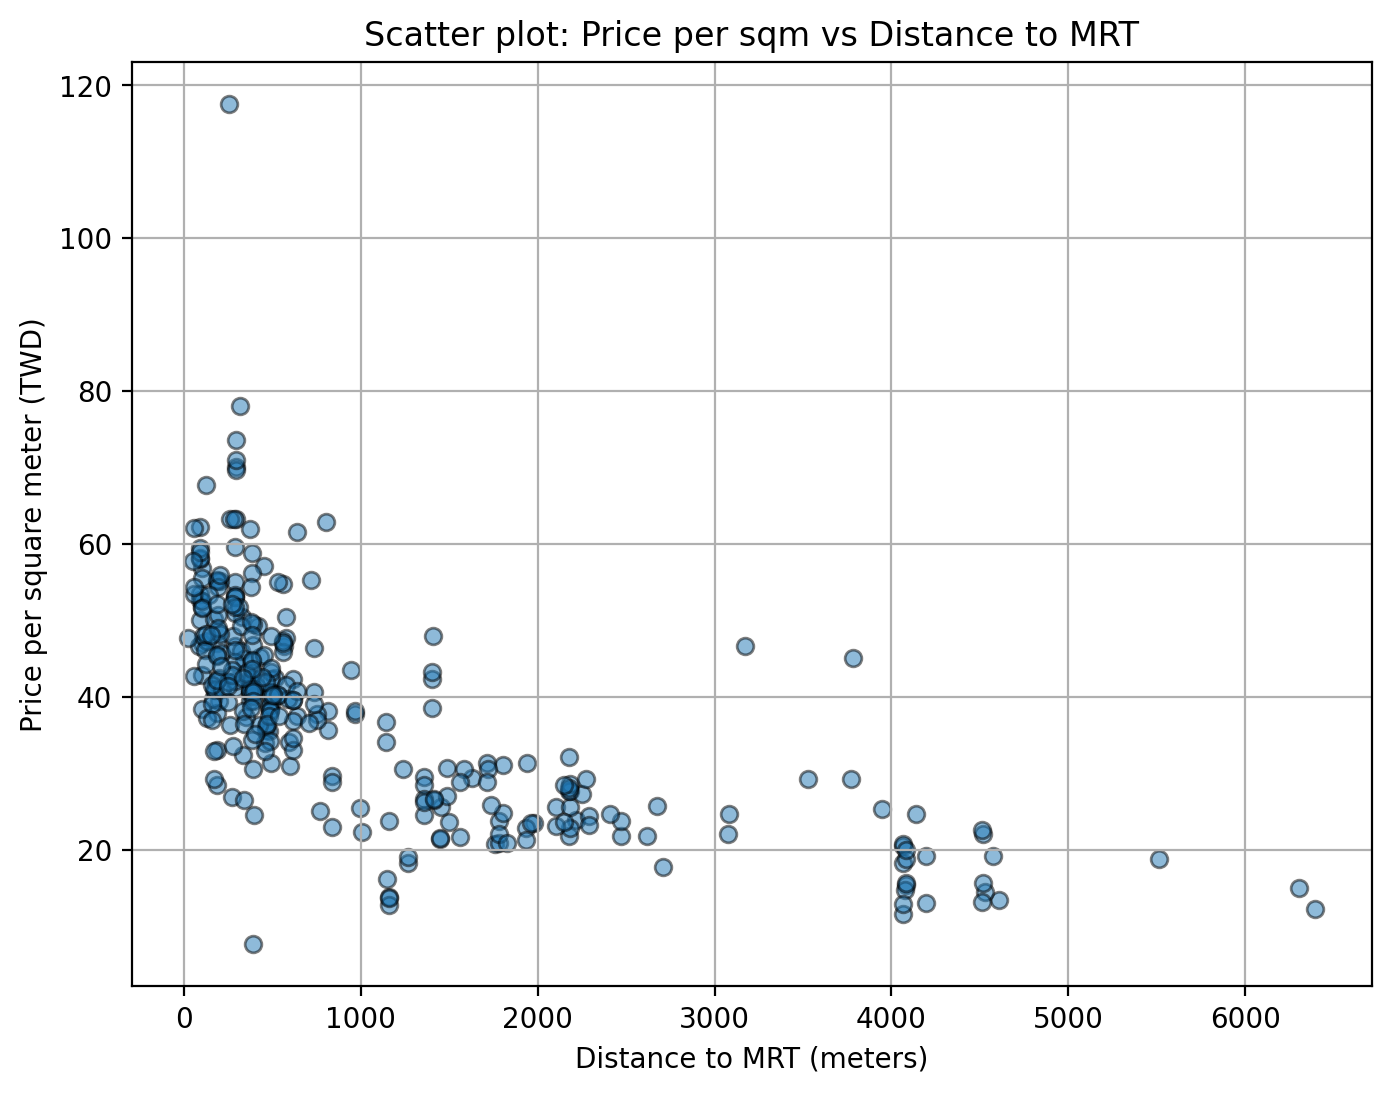

In [60]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(train['dist_to_mrt_m'], train['price_twd_msq'], alpha=0.5, edgecolor='k')
plt.title('Scatter plot: Price per sqm vs Distance to MRT')
plt.xlabel('Distance to MRT (meters)')
plt.ylabel('Price per square meter (TWD)')
plt.grid(True)
plt.show()

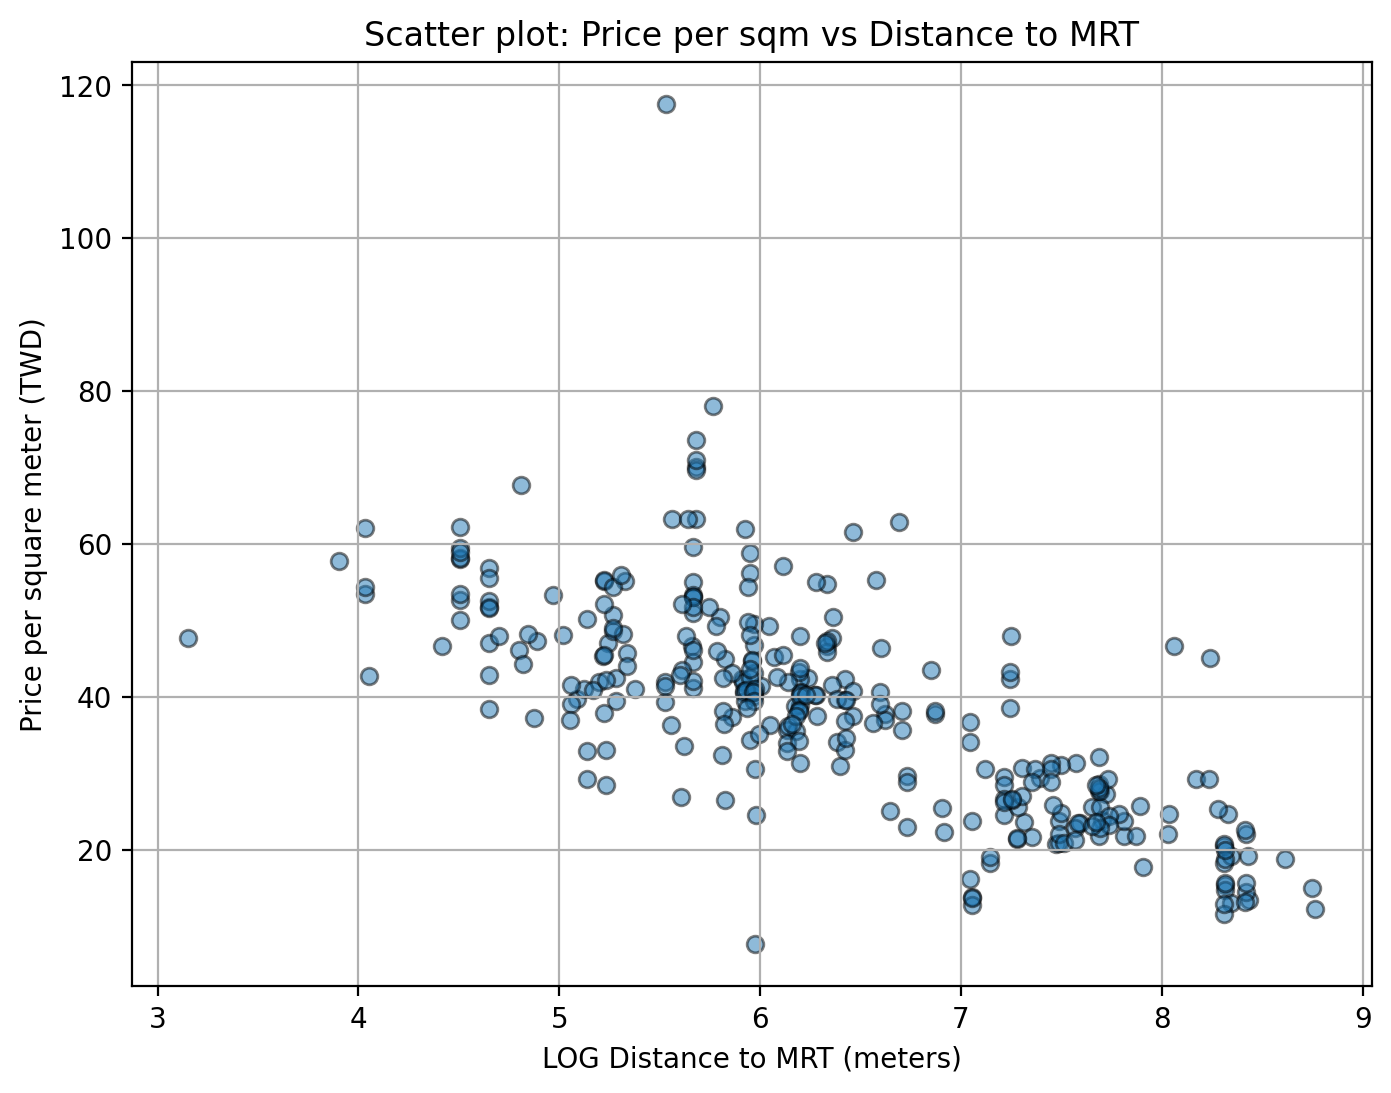

                            OLS Regression Results                            
Dep. Variable:          price_twd_msq   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     116.7
Date:                Sun, 08 Jun 2025   Prob (F-statistic):           2.09e-50
Time:                        19:34:58   Log-Likelihood:                -1138.7
No. Observations:                 310   AIC:                             2285.
Df Residuals:                     306   BIC:                             2300.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          92.2668      3.607     

In [61]:
# If any transformation is necessary, please estimate the Model3 with the transformed distance to mrt.


import numpy as np
import statsmodels.formula.api as smf

# Add log-transformed distance column (log(x) )
df_estate['log_dist_to_mrt'] = np.log(df_estate['dist_to_mrt_m'])
train['log_dist_to_mrt'] = np.log(train['dist_to_mrt_m'])



plt.figure(figsize=(8,6))
plt.scatter(train['log_dist_to_mrt'], train['price_twd_msq'], alpha=0.5, edgecolor='k')
plt.title('Scatter plot: Price per sqm vs Distance to MRT')
plt.xlabel( 'LOG Distance to MRT (meters)')
plt.ylabel('Price per square meter (TWD)')
plt.grid(True)
plt.show()
# Fit the model with log-transformed distance 
model3 = smf.ols('price_twd_msq ~ log_dist_to_mrt + house_age_0_15 + house_age_30_45', data=train)
result3 = model3.fit()

print(result3.summary())
mse_result4 = result3.mse_resid
rse_result4 = np.sqrt(mse_result4)
print('The residual standard error for the above model is:',np.round(rse_result4,3))

The results:

Key Model Outputs

R-squared	0.534	53.4% of price variation explained — reasonably strong for housing data.

Residual Std. Error	9.591	Indicates average size of error in predicted prices (TWD/sqm)



Coefficient Interpretation:


Intercep:  92.27	p_value<0.001  ->	Baseline price when all predictors = 0 (not directly interpretable here).

log_dist_to_mr:-8.69	p_value<0.001  ->	Highly significant. A 1-unit increase in log(distance) (≈2.72× farther) leads to a ~TWD 8.69 decrease per sqm.

house_age_0_15:	+3.26  	p_value=0.013-> New houses are ~TWD 3.26 more expensive per sqm than 15–30-year-old ones. Statistically significant.

house_age_30_45: -1.15  p_value=0.467	-> Not statistically different from 15–30-year-old homes.


Skew = 1.69	Long right tail: some high-priced outliers.


Kurtosis = 13.4	Heavy tails (leptokurtic): more extreme values than a normal distribution.










In [62]:
#Calculating residual standard error of Model1
mse_result1 = model1.mse_resid
rse_result1 = np.sqrt(mse_result1)
print('The residual standard error for the above model is:',np.round(rse_result1,3))

The residual standard error for the above model is: 10.069


In [63]:
#Calculating residual standard error of Model2
mse_result2 = result2.mse_resid
rse_result2 = np.sqrt(mse_result2)
print('The residual standard error for the above model is:',np.round(rse_result2,3))

The residual standard error for the above model is: 10.23


Looking at model summary, we see that variables .... are insignificant,      
so let's estimate the model without those variables: house_age_30_45

In [64]:
model_simplified = smf.ols('price_twd_msq ~ log_dist_to_mrt + house_age_0_15', data=train)
result_simplified = model_simplified.fit()
print(result_simplified.summary())

mse_result3= result_simplified.mse_resid
print('The residual standard error for the above model is:',np.round(np.sqrt(mse_result3),3))

                            OLS Regression Results                            
Dep. Variable:          price_twd_msq   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     175.1
Date:                Sun, 08 Jun 2025   Prob (F-statistic):           1.82e-51
Time:                        19:34:58   Log-Likelihood:                -1139.0
No. Observations:                 310   AIC:                             2284.
Df Residuals:                     307   BIC:                             2295.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          91.2756      3.338     

The discussion of resutls:

R-squared :	0.533	The model explains 53.3% of the variance in house prices — moderately strong.

Residual Std. Error	9.584	Indicates that actual prices typically deviate by ~TWD 9.58 per sqm from the predicted values.




Intercept:	91.28	< 0.001	Baseline price per sqm when log_dist_to_mrt and house_age_0_15 are 0. (Theoretical — not directly interpretable here).

log_dist_to_mrt:	−8.61	< 0.001	Statistically significant. A 1-unit increase in log(distance) (~2.7× farther) is associated with TWD 8.61 lower price per sqm.

house_age_0_15:	+3.74	0.001	Newer houses (0–15 yrs) are priced ~TWD 3.74 higher per sqm than middle-aged houses (15–30 yrs), holding distance constant.

### Evaluating multi-collinearity

There are many standards researchers apply for deciding whether a VIF is too large. In some domains, a VIF over 2 is worthy of suspicion. Others set the bar higher, at 5 or 10. Others still will say you shouldn't pay attention to these at all. Ultimately, the main thing to consider is that small effects are more likely to be "drowned out" by higher VIFs, but this may just be a natural, unavoidable fact with your model.

In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_vif = df_estate[['dist_to_mrt_m', 'house_age_0_15', 'house_age_30_45']].copy()
X_vif = X_vif.fillna(0)  # Fill missing values if any

# Add constant (intercept)
X_vif = sm.add_constant(X_vif)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print(vif_data)

           feature       VIF
0            const  4.772153
1    dist_to_mrt_m  1.061497
2   house_age_0_15  1.399276
3  house_age_30_45  1.400308


All  predictors have VIF < 2,except the intercept(but thats okay ) so there’s no multicollinearity issue.

The model is stable, the estimates of the coefficients are reliable and not distorted due to variables being too similar



Finally we test our best model on test dataset (change, if any transformation on dist_to_mrt_m was needed):

In [67]:
# Prepare test predictors (must match training predictors)
train['log_dist_to_mrt'] = np.log(train['dist_to_mrt_m'])
test['log_dist_to_mrt']=np.log(test['dist_to_mrt_m'])
X_test = test[['log_dist_to_mrt', 'house_age_0_15']].copy()
X_test = X_test.fillna(0)
X_test = sm.add_constant(X_test)

# True values
y_test = test['price_twd_msq']

# Predict using model2
y_pred = result_simplified.predict(X_test)

# Calculate RMSE as an example metric
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test RMSE: {rmse:.2f}")
print(df_estate['price_twd_msq'].mean())

Test RMSE: 7.26
37.980193236714975


 log transformation improved the model's predictive accuracy on new data. because new RMSE is smaller ,however comparing with the mean arount  38 the error is still significant
 


## Variable selection using best subset regression

*Best subset and stepwise (forward, backward, both) techniques of variable selection can be used to come up with the best linear regression model for the dependent variable medv.*

In [ ]:
# Best subset selection using sklearn's SequentialFeatureSelector (forward and backward)
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

# Prepare predictors and target
X = df_estate[['dist_to_mrt_m', 'n_convenience', 'house_age_0_15', 'house_age_15_30', 'house_age_30_45']]
y = df_estate['price_twd_msq']

# Initialize linear regression model
lr = LinearRegression()

# Forward stepwise selection
sfs_forward = SequentialFeatureSelector(lr, n_features_to_select='auto', direction='forward', cv=5)
sfs_forward.fit(X, y)
print("Forward selection support:", sfs_forward.get_support())
print("Selected features (forward):", X.columns[sfs_forward.get_support()].tolist())

# Backward stepwise selection
sfs_backward = SequentialFeatureSelector(lr, n_features_to_select='auto', direction='backward', cv=5)
sfs_backward.fit(X, y)
print("Backward selection support:", sfs_backward.get_support())
print("Selected features (backward):", X.columns[sfs_backward.get_support()].tolist())

Forward selection support: [ True  True False False False]
Selected features (forward): ['dist_to_mrt_m', 'n_convenience']
Backward selection support: [ True  True False False  True]
Selected features (backward): ['dist_to_mrt_m', 'n_convenience', 'house_age_30_45']


### Comparing competing models

In [ ]:
import statsmodels.api as sm

# Example: Compare AIC for models selected by forward and backward stepwise selection

# Forward selection model
features_forward = X.columns[sfs_forward.get_support()].tolist()
X_forward = df_estate[features_forward]
X_forward = sm.add_constant(X_forward)
model_forward = sm.OLS(y, X_forward).fit()
print("AIC (forward selection):", model_forward.aic)

# Backward selection model
features_backward = X.columns[sfs_backward.get_support()].tolist()
X_backward = df_estate[features_backward]
X_backward = sm.add_constant(X_backward)
model_backward = sm.OLS(y, X_backward).fit()
print("AIC (backward selection):", model_backward.aic)

# You can print summary for the best model (e.g., forward)
print(model_forward.summary())

AIC (forward selection): 3057.2813425866216
AIC (backward selection): 3047.991777087278
                            OLS Regression Results                            
Dep. Variable:          price_twd_msq   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     202.7
Date:                Sun, 08 Jun 2025   Prob (F-statistic):           5.61e-62
Time:                        19:04:39   Log-Likelihood:                -1525.6
No. Observations:                 414   AIC:                             3057.
Df Residuals:                     411   BIC:                             3069.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

From Best subset regression and stepwise selection (forward, backward, both), we see that the models selected by forward and backward selection may include different sets of predictors, depending on their contribution to model fit. 

By comparing AIC values, the model with the lowest AIC is preferred, as it balances model complexity and goodness of fit.

In this case, the summary output for the best model (e.g., forward selection) shows which variables are most important for predicting price_twd_msq. This approach helps identify the most relevant predictors and avoid overfitting by excluding unnecessary variables.

Run model diagnostics for the BEST model: In my case the backward selection is better

                            OLS Regression Results                            
Dep. Variable:          price_twd_msq   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     142.3
Date:                Sun, 08 Jun 2025   Prob (F-statistic):           3.42e-63
Time:                        19:04:39   Log-Likelihood:                -1520.0
No. Observations:                 414   AIC:                             3048.
Df Residuals:                     410   BIC:                             3064.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              39.7933      1.299     

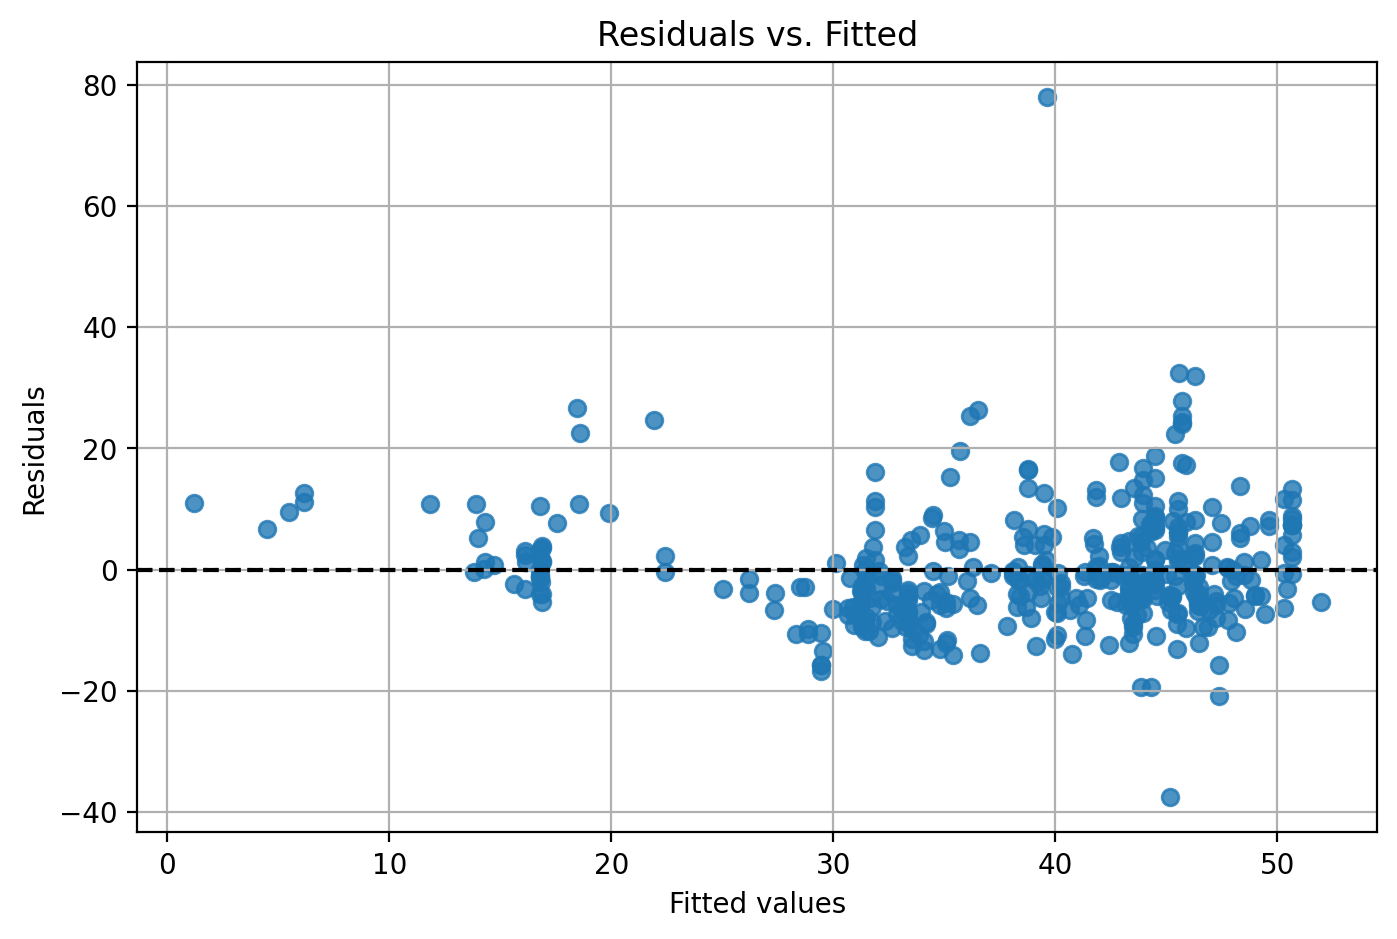

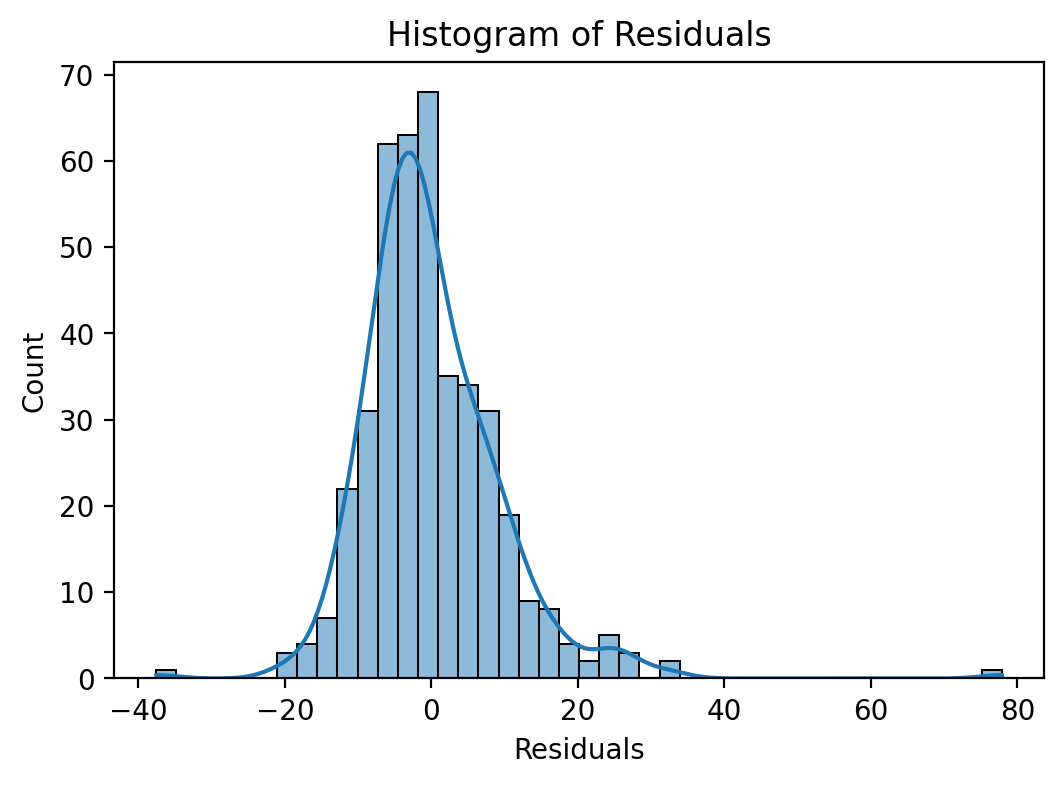

Residual Standard Error (RSE): 9.558


In [ ]:
print(model_backward.summary())

import matplotlib.pyplot as plt
import seaborn as sns

fitted_vals = model_backward.fittedvalues
residuals = model_backward.resid

plt.figure(figsize=(8, 5))
sns.residplot(x=fitted_vals, y=residuals)
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted')
plt.grid(True)
plt.show()

import scipy.stats as stats

# Histogram
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.show()

mse_backward = model_backward.mse_resid
rse_backward = np.sqrt(mse_backward)
print('Residual Standard Error (RSE):', np.round(rse_backward, 3))



R-squared = 0.510: Your model explains about 51% of the variability in property price per sqm. That’s a moderate fit.

Coefficient interpretation:

Intercept (const)	39.79	The expected price per sqm when all predictors are 0.

dist_to_mrt_m	-0.0056	For every 1 meter increase in MRT distance, price drops by ~5.6 TWD per sqm. Strongly significant (p < 0.001).

n_convenience	1.26	Each additional nearby convenience store increases the price by about 1.26 TWD/sqm. Also highly significant.

house_age_30_45	-3.81	Houses aged 30–45 are worth ~3.8 TWD/sqm less than the base group (newer homes). Significant at 1% level.




Finally, we can check the Out-of-sample Prediction or test error (MSPE):

In [68]:
X_test = test[features_forward].copy()
X_test = X_test.fillna(0)
X_test = sm.add_constant(X_test)

# True values
y_test = test['price_twd_msq']

# Predict using the best model (e.g., forward selection)
y_pred = model_forward.predict(X_test)

# Calculate MSPE (Mean Squared Prediction Error)
mspe = np.mean((y_test - y_pred) ** 2)
print(f"Test MSPE (out-of-sample): {mspe:.2f}")
print(df_estate['price_twd_msq'].mean())

Test MSPE (out-of-sample): 64.80
37.980193236714975


therefore RMSE is not that small relative to the average price per sqm but  the model has good predictive accuracy.

## Cross Validation

In Python, for cross-validation of regression models is usually done with cross_val_score from sklearn.model_selection.

To get the raw cross-validation estimate of prediction error (e.g., mean squared error), use:

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

X = df_estate[['dist_to_mrt_m', 'house_age_0_15', 'house_age_30_45']]
y = df_estate['price_twd_msq']

model = LinearRegression()

# 5-fold cross-validation, scoring negative MSE (so we multiply by -1 to get positive MSE)
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Raw cross-validation estimate of prediction error (mean MSE)
cv_mse = -cv_scores.mean()
cv_rmse = np.sqrt(cv_mse)

print(f"Cross-validated MSE: {cv_mse:.2f}")
print(f"Cross-validated RMSE: {cv_rmse:.2f}")

Cross-validated MSE: 95.90
Cross-validated RMSE: 9.79


# Summary

1. Do you understand all numerical measures printed in the SUMMARY of the regression report?
2. Why do we need a cross-validation?
3. What are the diagnostic plots telling us?
4. How to compare similar, but competing models?
5. What is VIF telling us?
6. How to choose best set of predictors for the model?

2.Why do we need cross-validation?
Because:

A model might perform well on training data but poorly on unseen data (overfitting).

Cross-validation (like k-fold CV) gives a more reliable estimate of a model's true predictive power by testing it on multiple train-test splits.

Helps in model selection

3.
Residuals vs Fitted: Should show random scatter. Patterns suggest non-linearity or omitted variables.

Residuals vs Leverage:	Identifies influential points. Look for outliers or high-leverage observations.

Normal Q-Q plot:	Residuals should lie on a straight line if normally distributed.

4.
Adjusted R²:	Penalizes for adding variables. Prefer higher.

Cross-validated RMSE / MSE	: Tests predictive performance. Lower = better.

5.
VIF = Variance Inflation Factor, used to detect multicollinearity (i.e., when predictors are highly correlated).
High VIFs suggest redundancy among predictors, which can:

-Inflate standard errors

-Make coefficient estimates unreliable

6 

Forward Selection	Start empty, add variables one by one based on improvement.
Backward Elimination	Start full, remove least significant variables.
Stepwise Selection	Mix of forward and backward.

